## Observations and Insights 

Three observations/inferences:
1) Ramicane and Capolmulin had the best outcomes ending with the smallest tumor volume.
2) Ramicane and Capolmulin also had the most timepoints tested. They had a fair sample size and also performed the best. This is reassuring to take it to next testing phase.
3) The correlation coefficient for Tumor Volume vs Mouse Weight for the Capolmulin regimen is .84, meaning there is very high correlation. As mouse weight increases, tumor volume increases.
4) Propriva had many duplicate mouse IDs and also the least time points. To make sure the data has high integrity it should be considered whether Propriva should be retested and reevaluated.

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linregress
import numpy as np

# Study data files
mouse_metadata_path = "../matplot hw - pymaceuticals/Mouse_metadata.csv"
study_results_path = "../matplot hw - pymaceuticals/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mousestudy_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [151]:
# Checking the number of mice.
mice_count = mousestudy_merge_df["Mouse ID"]
mice_count = mice_count.drop_duplicates()
mice_count.count()

249

In [152]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mousestudy_merge_df.duplicated()
dup1 = mousestudy_merge_df[mousestudy_merge_df.duplicated(["Mouse ID", "Timepoint"])]
# dup2 = dup1[dup1.duplicated("Timepoint")]
dup1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [153]:
# Optional: Get all the data for the duplicate mouse ID. 
mousestudy_merge_df.loc[mousestudy_merge_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedms_df = mousestudy_merge_df.loc[mousestudy_merge_df["Mouse ID"]!="g989"]
cleanedms_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [155]:
# Checking the number of mice in the clean DataFrame.
mouse_count = cleanedms_df["Mouse ID"].unique()
mouse_count = len(mouse_count)
mouse_count

248

## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    # ramicane = cleanedms_df["Tumor Volume (mm3)"].describe()["Ramicane"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = cleanedms_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = cleanedms_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = cleanedms_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sdev = cleanedms_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = cleanedms_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
summary = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance, "Tumor Volume Std.Dev": sdev, "Tumor Volume Std. Err.":sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggmethod = cleanedms_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
aggmethod

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [158]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_bar = cleanedms_df.groupby(["Drug Regimen"]).sum()
drug_timepoints = drug_bar[["Timepoint"]]


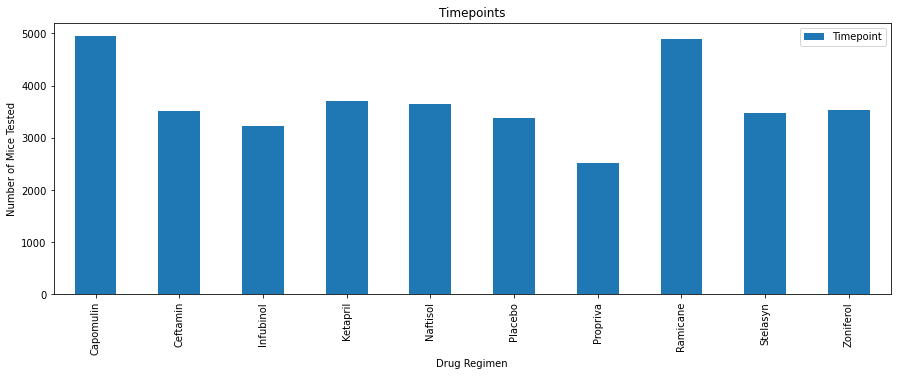

In [159]:
drug_timepoints.plot(kind="bar", figsize=(15,5))
plt.title("Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

Text(0, 0.5, 'Number of Mice Tested')

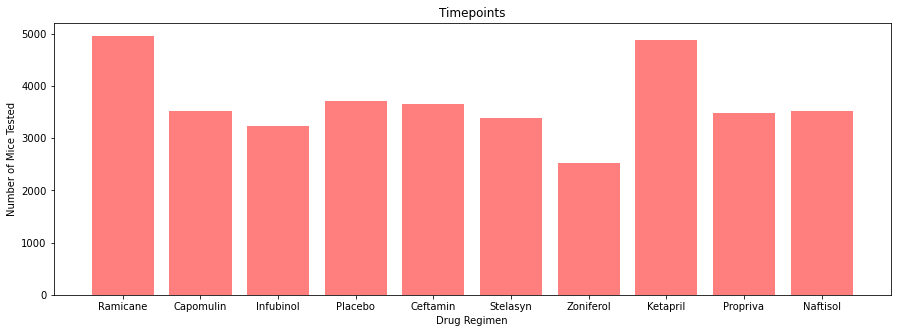

In [160]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(10)
plt.figure(figsize=(15,5))
plt.bar(x_axis, drug_bar["Timepoint"], color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zoniferol", "Ketapril", "Propriva", "Naftisol"])
plt.title("Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

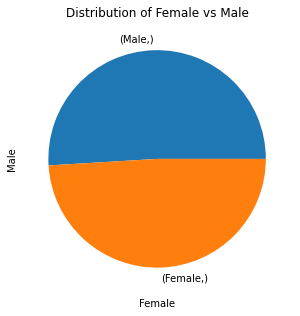

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
m_v_f = cleanedms_df[["Sex"]].value_counts()

m_v_f.plot(kind="pie", subplots=True, figsize=(5,5))

plt.title("Distribution of Female vs Male")
plt.xlabel("Female")
plt.ylabel("Male")
plt.show()


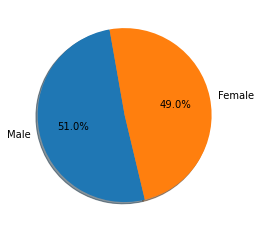

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
explode = (0, 0)
tp = [958, 922]
plt.pie(tp, explode=explode, labels=labels, shadow=True, startangle=100, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# tumor_vol = cleanedms_df.groupby("Mouse ID").max()
# tumor_vol = tumor_vol[["Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]]
# tumor_vol = tumor_vol.loc[(tumor_vol["Drug Regimen"]=="Capomulin") | (tumor_vol["Drug Regimen"]=="Ramicane") | (tumor_vol["Drug Regimen"]=="Infubinol") | (tumor_vol["Drug Regimen"]=="Ceftamin")]
# tumor_vol
# ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = cleanedms_df.groupby("Mouse ID").max()["Timepoint"]
lasttimepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumortimepoint_merge = pd.merge(lasttimepoint, cleanedms_df, on=("Mouse ID", "Timepoint"), how="left")
# tumortimepoint_merge.head()
tumortimepoint_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)


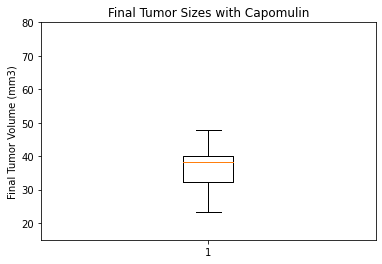

There are 0 outliers in the regimen for Capomulin regimen
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)


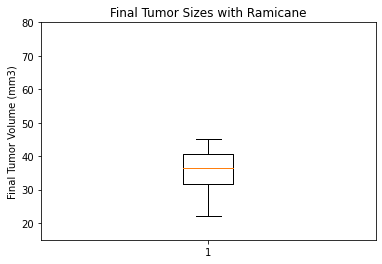

There are 0 outliers in the regimen for Ramicane regimen
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


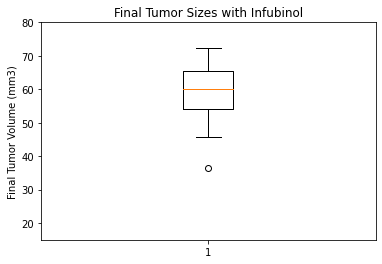

There are 1 outliers in the regimen for Infubinol regimen
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


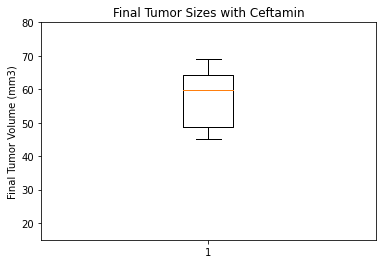

There are 0 outliers in the regimen for Ceftamin regimen


In [202]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    
# Create empty list to fill with tumor vol data (for plotting)
tumvol = []
for x in treatment_list:
    tumorvolume = tumortimepoint_merge.loc[tumortimepoint_merge["Drug Regimen"]==x, "Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumorvolume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    tumvol.append(x)
    # Determine outliers using upper and lower bounds
    outliers = tumorvolume.loc[(tumorvolume < lower_bound) | 
                                    (tumorvolume > upper_bound)]
    print(x, outliers)
    plt.boxplot(tumorvolume)
    plt.title(f'Final Tumor Sizes with {x}')
    plt.ylim(15,80)
    plt.ylabel('Final Tumor Volume (mm3)')
    plt.show()
    print(f'There are {len(outliers)} outliers in the regimen for {x} regimen')

## Line and Scatter Plots

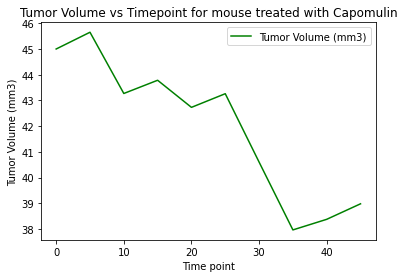

In [166]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = cleanedms_df.loc[(cleanedms_df["Drug Regimen"]=="Capomulin") 
                                     & (cleanedms_df["Mouse ID"]=="b128")]
tumvol = capomulin["Tumor Volume (mm3)"]
tpcap = capomulin["Timepoint"]
plt.plot(tpcap, tumvol, color="green", label="Tumor Volume (mm3)")
plt.legend(loc="best")
plt.title("Tumor Volume vs Timepoint for mouse treated with Capomulin")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


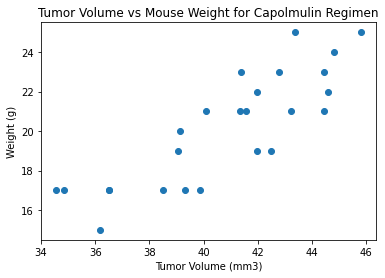

In [167]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mean = cleanedms_df[(cleanedms_df["Drug Regimen"]=="Capomulin")]
mean = mean[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]
mean = mean.groupby("Mouse ID").mean()
meantum = mean[["Tumor Volume (mm3)"]]
meanweight = mean[["Weight (g)"]]
plt.scatter(meantum, meanweight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Tumor Volume vs Mouse Weight for Capolmulin Regimen")
plt.show()

## Correlation and Regression

Text(0.5, 1.0, 'Tumor Volume vs Mouse Weight for Capolmulin Regimen')

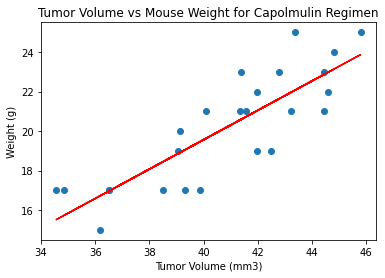

In [178]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mean["Tumor Volume (mm3)"]
y_values = mean["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Tumor Volume vs Mouse Weight for Capolmulin Regimen")

In [181]:
print(f"The correlation coefficient between Tumor Volume and Mouse Weight is {round(st.pearsonr(x_values,y_values)[0],2)}")


The correlation coefficient between Tumor Volume and Mouse Weight is 0.84
